##동적 헷지
동적 헷지(Dynamic Hedging)는 금융 파생상품의 포지션을 헷지하기 위해 기초 자산의 포지션을 지속적으로 조정하는 전략을 말합니다. 이는 기초 자산의 가격 변동과 시간의 경과에 따라 헷지 비율(델타)을 조정하여 포트폴리오의 민감도를 관리합니다.

동적 헷지의 주요 개념:

델타(Delta): 기초 자산 가격의 변화에 따른 옵션 가격의 변화율을 나타내는 민감도입니다. 델타 헷징은 포트폴리오의 델타를 중립적으로 유지하기 위해 기초 자산의 포지션을 조정하는 것을 의미합니다.

델타 중립(Delta-Neutral): 포트폴리오의 델타를 0으로 유지하는 상태를 말합니다. 델타 중립 상태에서는 기초 자산의 가격 변동이 포트폴리오 가치에 미치는 영향을 최소화할 수 있습니다.

시간의 경과 및 가격 변동: 기초 자산의 가격이 변하거나 옵션의 만기일이 가까워지면서 델타가 변화합니다. 이에 따라 헷지 포지션을 조정해야 합니다.

동적 헷지의 과정:

초기 포지션 설정: 옵션 포지션을 개시할 때, 기초 자산의 가격과 옵션의 델타를 기반으로 초기 헷지 포지션을 설정합니다.

델타 계산: 기초 자산 가격의 변화에 따라 옵션의 델타를 계산합니다.

포지션 조정: 델타 중립 상태를 유지하기 위해 기초 자산의 포지션을 조정합니다. 이를 통해 포트폴리오의 가치 변동을 최소화합니다.

반복: 옵션의 만기일까지 또는 포지션을 청산할 때까지 이 과정을 반복합니다.

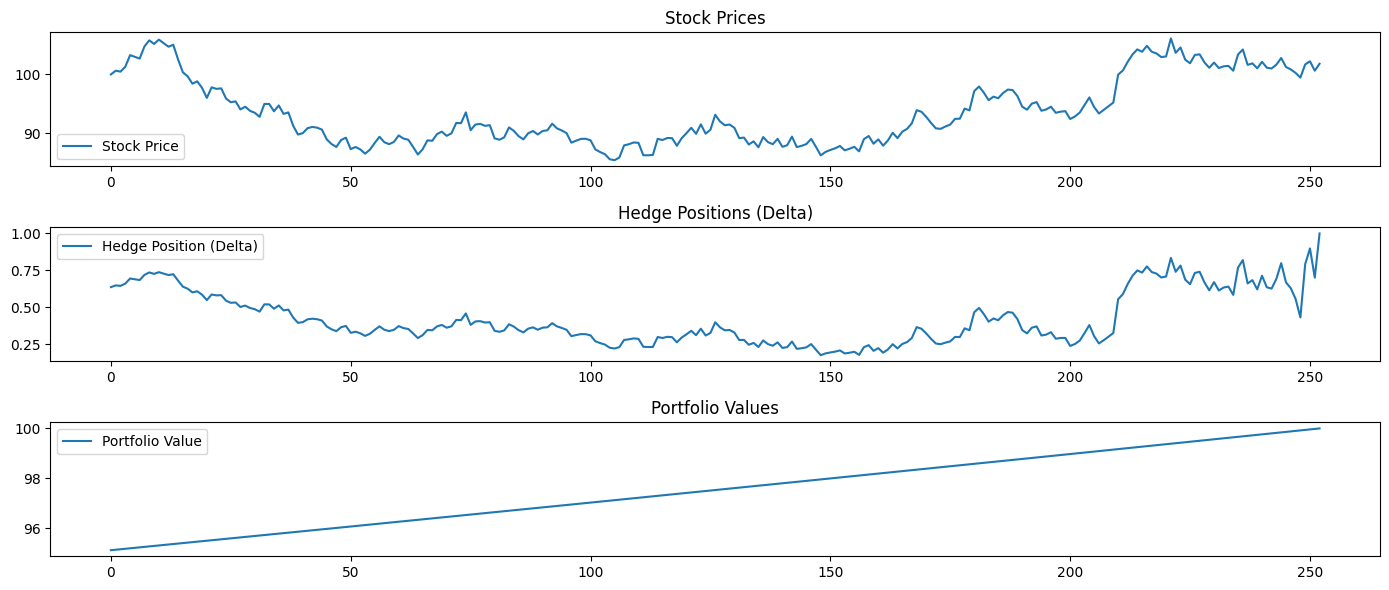

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

def black_scholes_delta(S, K, T, r, sigma, option_type="call"):
    """
    블랙-숄즈 모델을 사용하여 델타를 계산하는 함수

    Parameters:
    S: 현재 주식 가격
    K: 행사가격 (strike price)
    T: 옵션 만기 시간
    r: 무위험 이자율
    sigma: 주식 가격의 변동성
    option_type: "call" 또는 "put"

    Returns:
    델타 값
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == "call":
        delta = norm.cdf(d1)
    else:
        delta = norm.cdf(d1) - 1
    return delta

def dynamic_hedging(S0, K, T, r, sigma, option_type="call"):
    """
    동적 헷지 전략을 시뮬레이션하는 함수

    Parameters:
    S0: 초기 주식 가격
    K: 행사가격 (strike price)
    T: 옵션 만기 시간
    r: 무위험 이자율
    sigma: 주식 가격의 변동성
    option_type: "call" 또는 "put"

    Returns:
    시뮬레이션 결과 (주식 가격, 헷지 포지션, 포트폴리오 가치)
    """
    np.random.seed(42)
    dt = 1/252  # 하루 단위 시간 간격
    N = int(T * 252)  # 총 시간 단계 수 (1년 기준)
    stock_prices = [S0]
    hedge_positions = []
    portfolio_values = []

    # 초기 델타 계산
    delta = black_scholes_delta(S0, K, T, r, sigma, option_type)
    hedge_positions.append(delta)
    portfolio_values.append(delta * S0 - (S0 * delta - K * np.exp(-r * T)))

    # 주식 가격 시뮬레이션 및 헷지 포지션 조정
    for t in range(1, N+1):
        S = stock_prices[-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal())
        stock_prices.append(S)

        T -= dt
        delta = black_scholes_delta(S, K, T, r, sigma, option_type)
        hedge_positions.append(delta)
        portfolio_value = delta * S - (S * delta - K * np.exp(-r * T))
        portfolio_values.append(portfolio_value)

    return stock_prices, hedge_positions, portfolio_values

# 예제 파라미터
S0 = 100  # 초기 주식 가격
K = 100  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성

# 동적 헷지 시뮬레이션 실행
stock_prices, hedge_positions, portfolio_values = dynamic_hedging(S0, K, T, r, sigma, option_type="call")

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(stock_prices, label='Stock Price')
plt.title('Stock Prices')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(hedge_positions, label='Hedge Position (Delta)')
plt.title('Hedge Positions (Delta)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(portfolio_values, label='Portfolio Value')
plt.title('Portfolio Values')
plt.legend()

plt.tight_layout()
plt.show()
